<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Re-inforcement-Learning/blob/main/2348505_Lab6(RL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [ ]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

In [ ]:
class CustomEnv(gym.Env):
    def __init__(self):
        super(CustomEnv, self).__init__()
        self.observation_space = spaces.Box(low=0, high=10, shape=(3,), dtype=np.float32)
        self.action_space = spaces.Discrete(3)
        self.state = None
        self.max_steps = 50
        self.current_step = 0

    def reset(self):
        self.state = np.random.uniform(low=0, high=10, size=(3,))
        self.current_step = 0
        return self.state

    def step(self, action):
        self.current_step += 1
        reward = -np.sum((self.state - action) ** 2)
        self.state = self.state + np.random.normal(0, 1, size=self.state.shape)
        done = self.current_step >= self.max_steps
        return self.state, reward, done, {}

    def query_transition(self, state, action):
        next_state = state + np.random.normal(0, 1, size=state.shape)
        reward = -np.sum((state - action) ** 2)
        return next_state, reward

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, State: {self.state}")

    def close(self):
        pass


# Define a simple model-based agent
class SimpleModelBasedAgent:
    def __init__(self, env):
        self.env = env
        self.model = None
        self.state_history = []
        self.action_history = []
        self.reward_history = []
        self.episode_lengths = []

    def build_model(self):
        self.model = lambda s, a: self.env.query_transition(s, a)

    def plan(self, state):
        simulated_rewards = []
        for action in range(self.env.action_space.n):
            next_state, reward = self.model(state, action)
            simulated_rewards.append(reward)
        best_action = np.argmax(simulated_rewards)
        return best_action

    def train(self, episodes=10):
        for episode in range(episodes):
            state = self.env.reset()
            total_reward = 0
            steps = 0
            while True:
                action = self.plan(state)
                self.state_history.append(state)
                self.action_history.append(action)
                state, reward, done, _ = self.env.step(action)
                total_reward += reward
                steps += 1
                if done:
                    break
            self.reward_history.append(total_reward)
            self.episode_lengths.append(steps)


# Define visualization functions
def visualize_state_transitions(agent):
    plt.figure(figsize=(10, 6))
    state_hist = np.array(agent.state_history)
    plt.plot(state_hist[:, 0], label='State Dimension 1', color='blue', alpha=0.7)
    plt.plot(state_hist[:, 1], label='State Dimension 2', color='orange', alpha=0.7)
    plt.plot(state_hist[:, 2], label='State Dimension 3', color='green', alpha=0.7)
    plt.title('State Transitions Over Time')
    plt.xlabel('Steps')
    plt.ylabel('State Value')
    plt.legend()
    plt.grid()
    plt.show()


def visualize_rewards(agent):
    plt.figure(figsize=(10, 6))
    plt.plot(agent.reward_history, marker='o', color='green')
    plt.title('Episode Rewards')
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.grid()
    plt.show()


def visualize_actions(agent):
    plt.figure(figsize=(10, 6))
    plt.hist(agent.action_history, bins=np.arange(agent.env.action_space.n + 1) - 0.5, rwidth=0.8, color='purple')
    plt.title('Action Distribution')
    plt.xlabel('Actions')
    plt.ylabel('Frequency')
    plt.xticks(range(agent.env.action_space.n))
    plt.grid()
    plt.show()


def visualize_episode_lengths(agent):
    plt.figure(figsize=(10, 6))
    plt.plot(agent.episode_lengths, marker='s', color='red')
    plt.title('Episode Lengths')
    plt.xlabel('Episodes')
    plt.ylabel('Number of Steps')
    plt.grid()
    plt.show()


def summarize_results(agent):
    avg_reward = np.mean(agent.reward_history)
    avg_length = np.mean(agent.episode_lengths)
    print(f"Average Reward per Episode: {avg_reward:.2f}")
    print(f"Average Episode Length: {avg_length:.2f}")
    print(f"Total Training Episodes: {len(agent.reward_history)}")

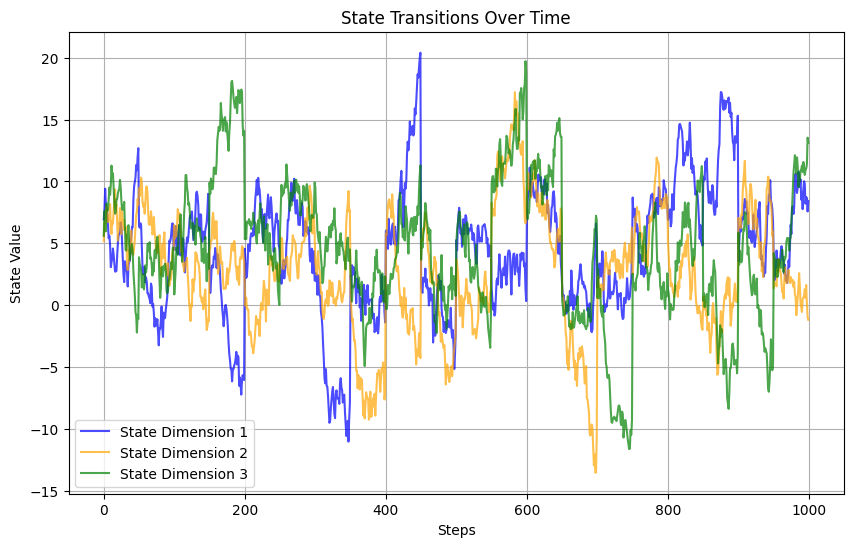

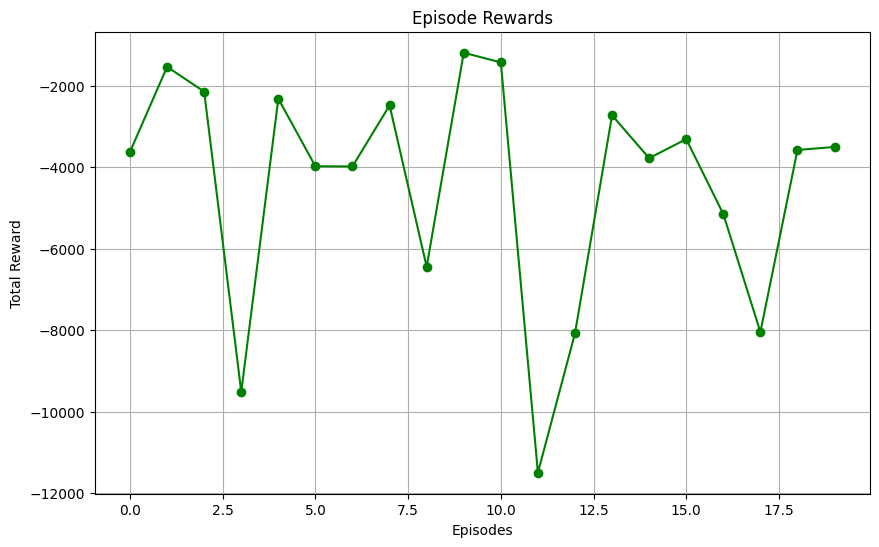

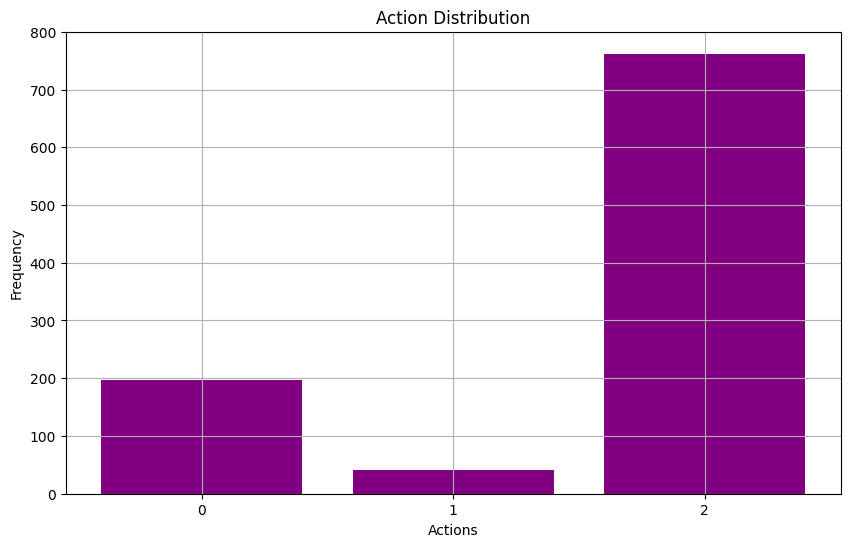

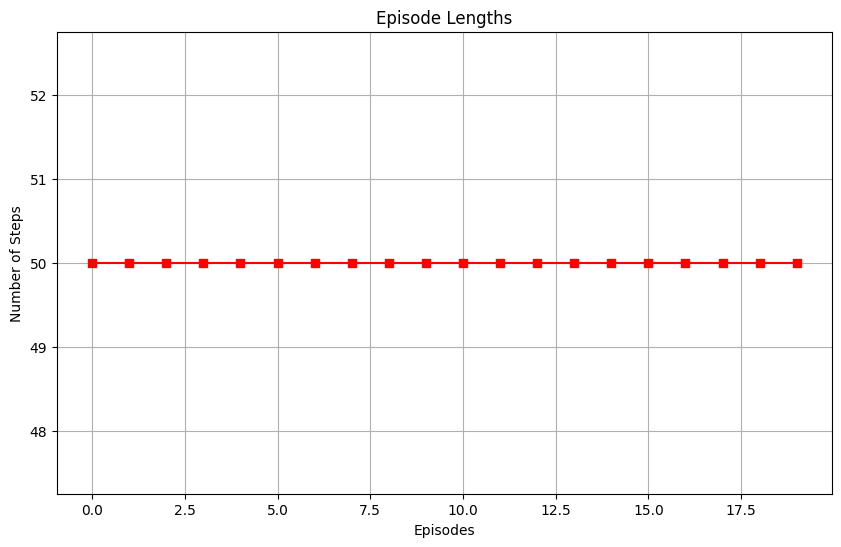

Average Reward per Episode: -4415.60
Average Episode Length: 50.00
Total Training Episodes: 20


In [ ]:
# Main execution
env = CustomEnv()
agent = SimpleModelBasedAgent(env)
agent.build_model()
agent.train(episodes=20)

# Visualizations
visualize_state_transitions(agent)
visualize_rewards(agent)
visualize_actions(agent)
visualize_episode_lengths(agent)
summarize_results(agent)

1. **Environment Definition**:
   - `CustomEnv` simulates an RL environment with a continuous state space and discrete action space.
   - States evolve based on random Gaussian noise, and rewards depend on the mismatch between the state and the action.

2. **Model-Based Agent**:
   - The agent uses a simulated model (`query_transition`) to predict the next state and reward for each action.
   - It plans actions by selecting the one with the highest predicted reward in the current state.

3. **Training Loop**:
   - The agent interacts with the environment for multiple episodes, selecting actions based on its simulated model.
   - States and rewards are recorded for analysis.

4. **Visualization**:
   - **State Transitions**: Plots the evolution of state dimensions over time.
   - **Episode Rewards**: Tracks the total rewards earned in each episode, providing insight into agent performance.
